In [33]:
# Run this cell to install and import the necessary libraries and load the required variables
!pip install gymnasium[toy_text] imageio
import numpy as np
import gymnasium as gym
import imageio
from IPython.display import Image
from gymnasium.utils import seeding

# Initialize the Taxi-v3 environment
env = gym.make("Taxi-v3", render_mode='rgb_array')

# Seed the environment for reproducibility
env.np_random, _ = seeding.np_random(42)
env.action_space.seed(42)
np.random.seed(42)

# Maximum number of actions per training episode
max_actions = 100 

Defaulting to user installation because normal site-packages is not writeable


In [34]:
# Initializing Q-learning vars and params for training

num_episodes = 2000
alpha = 0.1
gamma = 1
epsilon = 1.0
min_epsilon = 0.01
epsilon_decay = 0.001

num_states, num_actions = env.observation_space.n, env.action_space.n
q_table = np.zeros((num_states, num_actions))


In [35]:
# Defining update_q_table function using Q-Learning algoritm

def update_q_table(state, action, reward, new_state):
    old_value = q_table[state, action]
    next_max = max(q_table[new_state])
    q_table[state, action] = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)


In [ ]:
# Defining epsilon-greedy strategy function

def epsilon_greedy(state):
    if np.random.rand() < epsilon:
        return env.action_space.sample()
    else:
        return np.argmax(q_table[state])

In [36]:
# Implementing Q-learning training loop

episode_returns = []

for episode in range(num_episodes):
    state, info = env.reset()
    terminated = False
    episode_reward = 0
    for i in range(max_actions):
        action = epsilon_greedy(state)
        next_state, reward, terminated, truncated, info = env.step(action)
        update_q_table(state, action, reward, next_state)
        state = next_state
        total_reward += reward
        if terminated:
          break
    episode_returns.append(episode_reward)
    epsilon = max(min_epsilon, epsilon*epsilon_decay)

In [37]:
# Getting learned policy

policy = {state: np.argmax(q_table[state]) for state in range(num_states)}


In [38]:
## Testing the agent's behavior

frames = []
state, info = env.reset(seed=42)
frames.append(env.render())
episode_total_reward = 0
for i in range(16): # Execute maximum 16 moves
    action = policy[state] 
    state, reward, terminated, truncated, info = env.step(action)
    episode_total_reward += reward
    frames.append(env.render())
    if terminated:
      break    


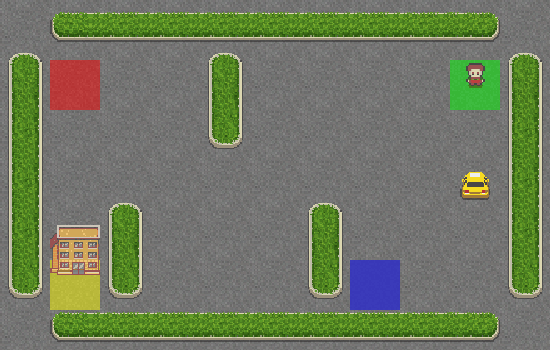

In [39]:
# Run this cell to visualize the agent's behavior through the episode
# Save frames as a GIF
imageio.mimsave('taxi_agent_behavior.gif', frames, fps=5)

# Display GIF
gif_path = "taxi_agent_behavior.gif" 
Image(gif_path) 